In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [6]:
data.shape

(1048575, 11)

In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

0 in each column means that there are no null values

In [8]:
data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [9]:
data.isFlaggedFraud.value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

This means 1142 are true in isFraud column and none are true in isFlaggedFraud column

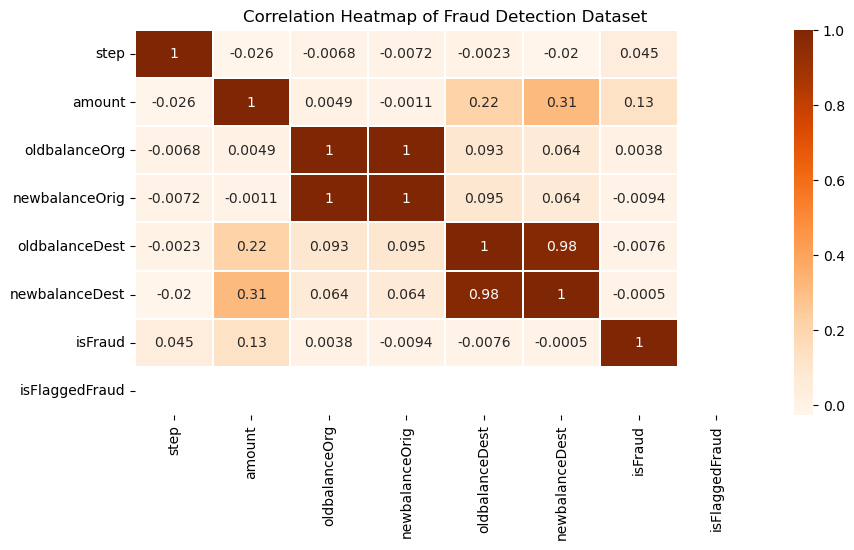

In [10]:
#We can now create a heatmap to see the correlation of the features
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), linewidth=0.2, annot=True, cmap="Oranges");
plt.title('Correlation Heatmap of Fraud Detection Dataset')
plt.show()

Maximum correlation between New Balance Destination and Old Balance destination 0.86 means that new balance may most probably be dervied directly from old balance. The correlation of amount with isFraud (0.13) mean that there are some chances of a higher amount transaction being fraudulent. Most other features have low or near 0 correlation, implying that there is no significant relation between them.

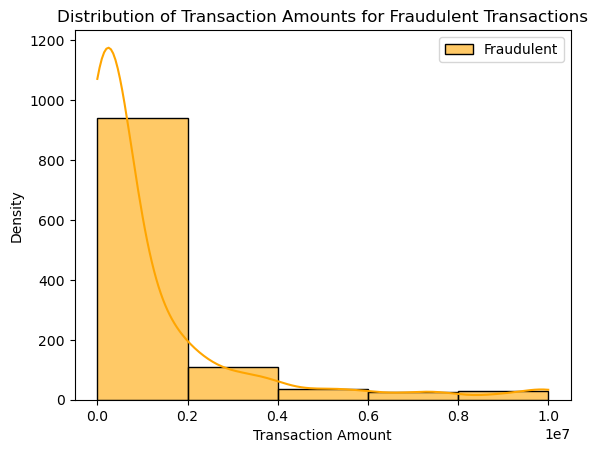

In [11]:
#We can explore the distribution of amount and isFraud relation further
sns.histplot(data[data['isFraud'] == 1]['amount'], bins=5,color='orange',label='Fraudulent', kde=True, alpha=0.6)
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Distribution of Transaction Amounts for Fraudulent Transactions')
plt.legend()

plt.show()

Most fraudulent transactions involve a relatively smaller amount. This might suggest that fraudsters try to avoid detection by keeping the amounts low. The distribution has a long tail extending towards higher amounts. Although less frequent, there are still some fraudulent transactions with significantly larger amounts.

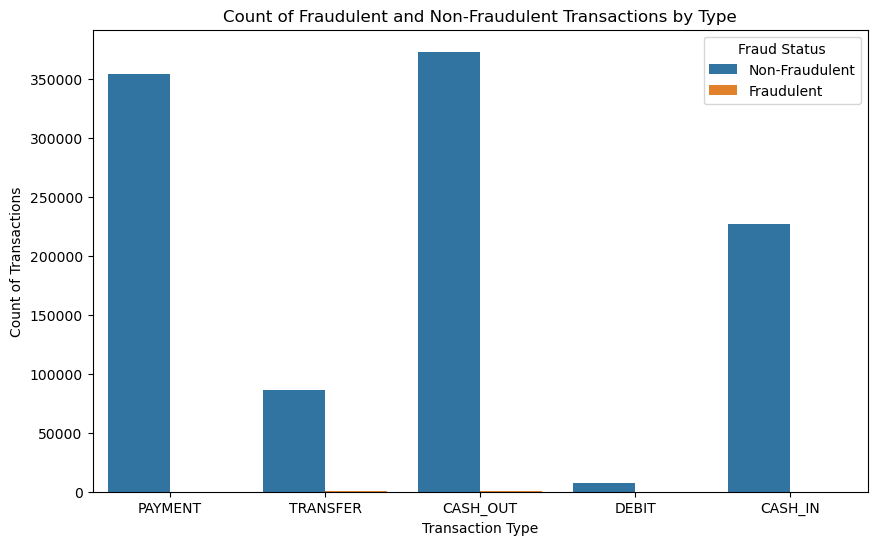

In [12]:
#using a bar chart to compare the fraudulent vs non-fraudulent transaction by types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', hue='isFraud')

plt.xlabel('Transaction Type')
plt.ylabel('Count of Transactions')
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Type')
plt.legend(title='Fraud Status', loc='upper right', labels=['Non-Fraudulent', 'Fraudulent'])

plt.show()

Cash out and payment transaction types have the highest no. of transactions overall, nearly all of which is is non-fraudulent. Fraudulent transactions are mainly concentrated in cashout and transfer types. 

In [13]:
#to convert categorical columns to numeric data type
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['type']=label_encoder.fit_transform(data["type"])

In [14]:
data= data.drop(["step","nameOrig", "nameDest","isFlaggedFraud"], axis=1)
print(data)
#these columns have no more relevant contribution to the model hence removing it will make the data much more easier to use

         type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           3    9839.64      170136.00       160296.36            0.00   
1           3    1864.28       21249.00        19384.72            0.00   
2           4     181.00         181.00            0.00            0.00   
3           1     181.00         181.00            0.00        21182.00   
4           3   11668.14       41554.00        29885.86            0.00   
...       ...        ...            ...             ...             ...   
1048570     1  132557.35      479803.00       347245.65       484329.37   
1048571     3    9917.36       90545.00        80627.64            0.00   
1048572     3   14140.05       20545.00         6404.95            0.00   
1048573     3   10020.05       90605.00        80584.95            0.00   
1048574     3   11450.03       80584.95        69134.92            0.00   

         newbalanceDest  isFraud  
0                  0.00        0  
1                  0.00      

In [15]:
#segregating features and target variable
x,y=data.loc[:, data.columns != "isFraud"], data["isFraud"]

In [16]:
#Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) 
print(x_train)

        type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
656253     1  235260.89            0.0            0.00      9313543.49   
329191     1   87797.45        45011.0            0.00        22971.49   
557768     0  172963.03      6193631.6      6366594.63      1281954.82   
93060      3    8500.59        29541.0        21040.41            0.00   
558339     1  312768.04            0.0            0.00      1723942.22   
...      ...        ...            ...             ...             ...   
491263     1  140745.33            0.0            0.00      1880641.65   
791624     3   21804.46            0.0            0.00            0.00   
470924     3   17262.78        11879.0            0.00            0.00   
491755     1  273913.55        30175.0            0.00            0.00   
128037     4  168563.12            0.0            0.00       305677.12   

        newbalanceDest  
656253      9548804.38  
329191       110768.94  
557768      1108991.79  
93060      

In [17]:
print(y_train)

656253    0
329191    0
557768    0
93060     0
558339    0
         ..
491263    0
791624    0
470924    0
491755    0
128037    0
Name: isFraud, Length: 838860, dtype: int64


In [18]:
print(y_test)

1045953    0
358409     0
875012     0
555046     0
272972     0
          ..
181305     0
672605     0
718823     0
1006146    0
23489      0
Name: isFraud, Length: 209715, dtype: int64


In [19]:
print(x_test)

         type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1045953     3   11495.79         130.00            0.00            0.00   
358409      0   29929.26      446887.83       476817.09       114721.05   
875012      4  381123.29           0.00            0.00       441980.11   
555046      1  127898.48       70466.00            0.00        71619.85   
272972      3    7932.65           0.00            0.00            0.00   
...       ...        ...            ...             ...             ...   
181305      0  331635.14     1776775.72      2108410.86       627768.80   
672605      0   19512.81     5093375.25      5112888.06       446994.17   
718823      3   63172.43      208526.08       145353.65            0.00   
1006146     0  266602.30     9564618.94      9831221.24      1676620.07   
23489       1   71749.53           0.00            0.00       959066.14   

         newbalanceDest  
1045953            0.00  
358409         84791.79  
875012        823103.

In [20]:
#now we normalize the rest of the column values (amount, oldbalanceorig, newbalanceorig, oldbalancedest, new balancedest), because when there is drastic difference in values, machine learning model will have bias
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train) 
x_test=sc.fit_transform(x_test)

In [21]:
print(x_train)

[[-5.30030278e-01  2.87387916e-01 -2.94152815e-01 -2.97195594e-01
   3.62517126e+00  3.48634129e+00]
 [-5.30030278e-01 -2.66878232e-01 -2.78986732e-01 -2.97195594e-01
  -4.15951587e-01 -4.15252612e-01]
 [-1.27327553e+00  5.32309281e-02  1.79273996e+00  1.82196203e+00
   1.31668763e-01 -2.59679887e-03]
 ...
 [ 9.56460218e-01 -5.31994656e-01 -2.90150285e-01 -2.97195594e-01
  -4.25943503e-01 -4.61043436e-01]
 [-5.30030278e-01  4.32670441e-01 -2.83985599e-01 -2.97195594e-01
  -4.25943503e-01 -3.47810185e-01]
 [ 1.69970547e+00  3.66931262e-02 -2.94152815e-01 -2.97195594e-01
  -2.92983036e-01 -2.64997040e-01]]


In [22]:
print(x_test)

[[ 0.95703984 -0.5630106  -0.2938822  -0.29681135 -0.42564654 -0.46114067]
 [-1.27638918 -0.49223493 -0.14432493 -0.13913775 -0.3755027  -0.42591129]
 [ 1.70151618  0.85618152 -0.29392572 -0.29681135 -0.23245985 -0.11915682]
 ...
 [ 0.95703984 -0.36459712 -0.22411924 -0.24874589 -0.42564654 -0.46114067]
 [-1.27638918  0.41647591  2.90793951  2.95417124  0.30719341  0.12469497]
 [-0.53191284 -0.33166517 -0.29392572 -0.29681135 -0.00644484  0.1009285 ]]


## Logistic Regression

In [23]:
#Creating a logistic regression model to analyze data and create prediction model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [24]:
#Predicting test set values
y_pred = classifier.predict(x_test)
y_test_array = y_test.to_numpy()

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_array.reshape(len(y_test),1)),1))
#creates a side by side comparison of predicted result and actual result of targeted output(isFraud)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [25]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[209481     20]
 [   167     47]]


0.9991083136637818

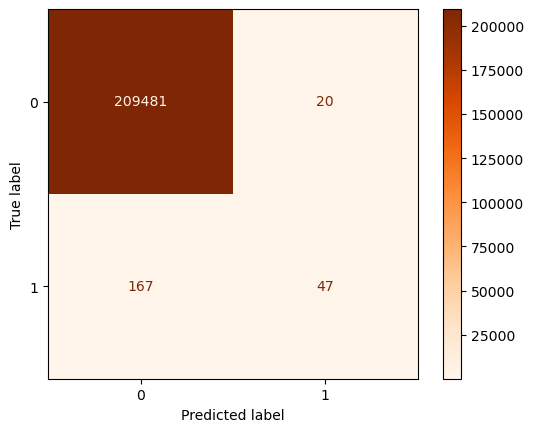

In [26]:
#above accuracy score is the accuracy of the model.
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap='Oranges')
plt.show()

Confusion matrix shows that from the test set, there are 209481 true positives, 47 true negatives, 20 false positives and 167 false negatives. This means that there 187 values that were inaccurately predicted in the model, whereas the rest of the predictions stand correct.

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.70
Recall: 0.22
F1 Score: 0.33


Model has low false positives (non-fraud identified as fraud) which is good but it's low recall or true positive rate indicates that the model only correctly identifies 22% of the actual fraudulent transactions. F1 score is also low showing imbalance between precision and recall, i.e model may be fairly accurate but it misses a significant portion of the fraudulent transactions

In [28]:
#to get the predicted probabilities for x_test
y_pred_prob = classifier.predict_proba(x_test)[:,1]
print(y_pred_prob)

[1.01497972e-03 4.06352561e-04 1.08846845e-03 ... 1.34651883e-03
 4.35711828e-08 3.61625220e-04]


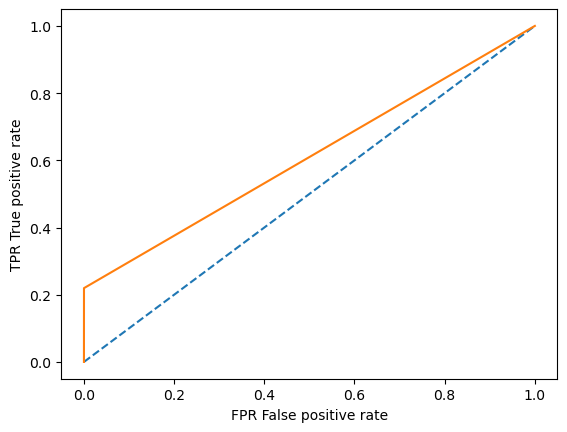

In [29]:
#Now we'll plot the roc curve (true positive rate vs false positive rate for a threshold)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--') #this plots a straight line (random classifier) on the graph
plt.plot(fpr, tpr)
plt.xlabel('FPR False positive rate')
plt.ylabel('TPR True positive rate')
plt.show()

The classifier's performance is better than a random classifier since the curve is above the random classifier. To further check the quality we will need to auc score which should be inclining to 1 for a perfect model

In [30]:
print(f'model AUC score: {roc_auc_score(y_test, y_pred)}')

model AUC score: 0.6097653516430921


So the model auc is closer to 0.5 than 1 which means it has very little discriminative ability to predict fraudulent and non-fraudulent transactions

## Random Forest

In [31]:
#training the random forest classifier model
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
#predicting test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_array.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[209501      0]
 [   210      4]]


0.9989986410128031

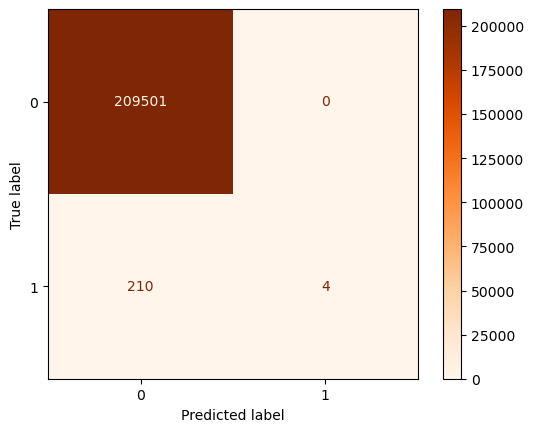

In [34]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap='Oranges')
plt.show()

Confusion matrix shows that there are 20941 true positives, 210 false negatives, 4 true negatives and 0 false positives. This means the model was unable to predict 210 values correctly. 

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 1.00
Recall: 0.02
F1 Score: 0.04


The precision and accuracy of the model is excellent. However even though the model predicts fraudulent transactions correctly each time, Recall shows that it only predicts fraudulent transactions 2% of the time, so it is alarming to note that it misses 98% of the fraudulent transactions. Because of this imbalance between precision and recall, f1 score is low which shows ineffectiveness of the model

In [37]:
#calculating predicted probability
y_pred_prob = classifier.predict_proba(x_test)[:,1]
print(y_pred_prob)

[0. 0. 0. ... 0. 0. 0.]


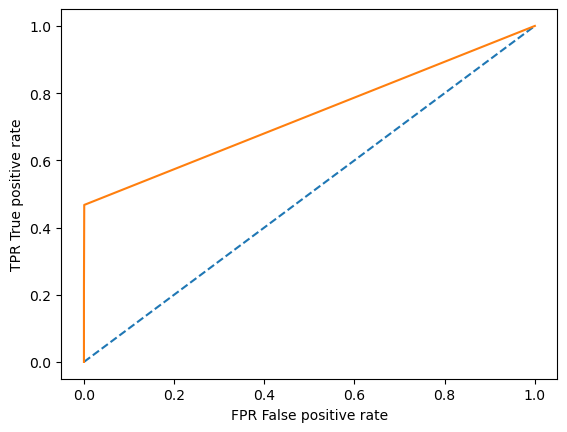

model AUC score: 0.5093457943925234


In [38]:
#plotting the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'--') #this plots a straight line (random classifier) on the graph
plt.plot(fpr, tpr)
plt.xlabel('FPR False positive rate')
plt.ylabel('TPR True positive rate')
plt.show()
print(f'model AUC score: {roc_auc_score(y_test, y_pred)}')

AUC score of 0.5 shows that the model performs almost as good as a random classifier. There is not much deviation from the random classifier so the model shows minimal predictive power. 

## Decision Tree

In [43]:
#training a Decision tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0, criterion="entropy")
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
#predicting test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_array.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [45]:
#Making the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[209494      7]
 [   159     55]]


0.9992084495625015

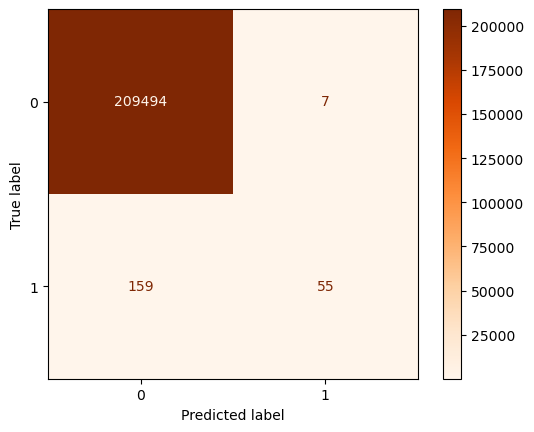

In [42]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap='Oranges')
plt.show()

Confusion matrix depicts 209494 true positive values, 7 false positive values, 159 false negatives and 55 true negative values. This means that model fails to correctly classify 166 transactions.

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.89
Recall: 0.26
F1 Score: 0.40


The accuracy and precision is high which means that the model's classification is correct most of the time. The recall catches only 26% of the fraudulent cases. There is still scope of improvement in this case, however decision tree performed better than logistic regression and random forest for this case. F1 score can also be further improved but shows a somewhat better balance between precision and Recall.

In [47]:
#calculating predicted probability
y_pred_prob = classifier.predict_proba(x_test)[:,1]
print(y_pred_prob)

[0. 0. 0. ... 0. 0. 0.]


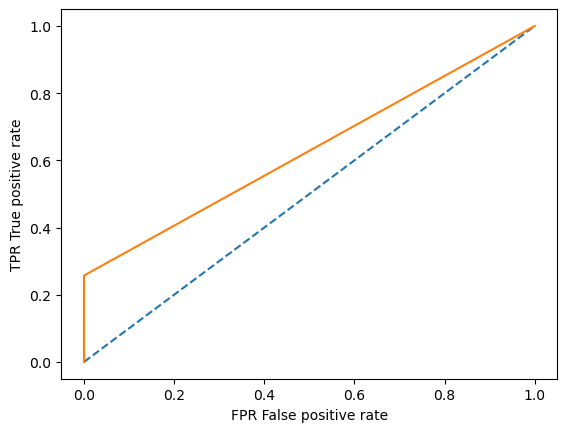

model AUC score: 0.6284879665330261


In [49]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'--') 
plt.plot(fpr, tpr)
plt.xlabel('FPR False positive rate')
plt.ylabel('TPR True positive rate')
plt.show()
print(f'model AUC score: {roc_auc_score(y_test, y_pred)}')

AUC score suggests that the model has some ability to distinguish between fraudulent and non-fraudulent transactions but not highly accurate.